<a href="https://colab.research.google.com/github/jrkirschner2004-ctrl/ML-F2025/blob/main/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Joseph Kirschner
#RIN 662038912
# Q1 Creating New Features


In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [ ]:
newfeat=np.zeros([150,2])
newfeat[:,0]=np.multiply(iris.data[:,0],iris.data[:,1]) # sepal area
newfeat[:,1]=np.multiply(iris.data[:,2],iris.data[:,3]) # petal area
#print(newfeat)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# target = function of feature names

### (setosa, versicolor, viriginica) = f(sepal area, petal area)

In [ ]:
X = newfeat
y = iris.target

In [ ]:
X.shape

(150, 2)

In [ ]:
y.shape

(150,)

In [ ]:
%notebook inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Petal Area (cm^2)')

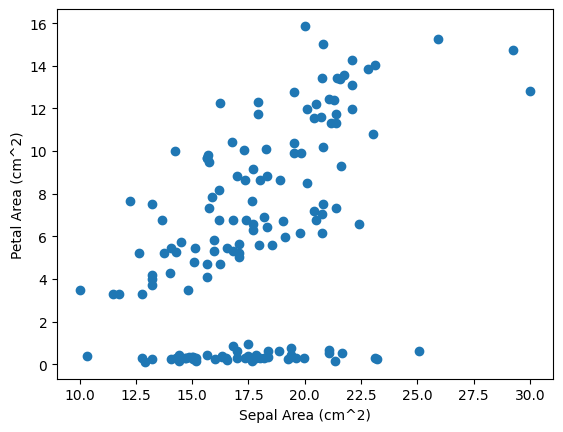

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Sepal Area (cm^2)')
plt.ylabel('Petal Area (cm^2)')


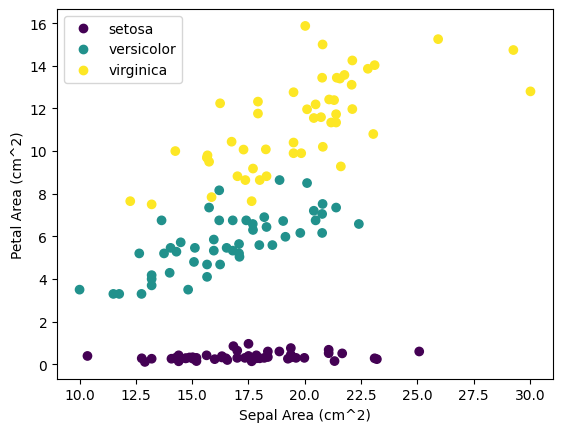

In [ ]:

plot = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Sepal Area (cm^2)')
plt.ylabel('Petal Area (cm^2)')
plt.legend(handles=plot.legend_elements()[0], labels=iris.target_names.tolist())


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
preds = clf.predict(X_test)
print(preds)

[1 1 1 1 0 2 1 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


In [ ]:
print('actual iris species')
print(y_test)

actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.95


# Q2 kNN, data wrangling, pairplot, heatmap

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

even_mask = y.isin(['0', '2', '4', '6', '8'])

X = X[even_mask]
y = y[even_mask]

print("Shape of X_even:", X.shape)
print("Shape of y_even:", y.shape)
print("Unique values in y_even:", y.unique())

Shape of X_even: (34418, 784)
Shape of y_even: (34418,)
Unique values in y_even: ['0', '4', '2', '6', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [ ]:
X_even_np = X_even.to_numpy()
y_even_np = y_even.to_numpy()

print("Type of X_even_np:", type(X_even_np))
print("Type of y_even_np:", type(y_even_np))

Type of X_even_np: <class 'numpy.ndarray'>
Type of y_even_np: <class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (25813, 784)
Shape of X_test: (8605, 784)
Shape of y_train: (25813,)
Shape of y_test: (8605,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9886112725159791

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1720
           2       0.99      0.98      0.99      1748
           4       0.98      1.00      0.99      1685
           6       0.99      0.99      0.99      1740
           8       1.00      0.98      0.99      1712

    accuracy                           0.99      8605
   macro avg       0.99      0.99      0.99      8605
weighted avg       0.99      0.99      0.99      8605


Confusion Matrix:
[[1710    2    4    4    0]
 [  13 1720    5    3    7]
 [   0    2 1680    3    0]
 [   8    0    5 1726    1]
 [  12    9   12    8 1671]]


A pairplot could techincally be used to plot this data but it would not be very helpful since pairing up 2 of the 784 features is not going to accurately separate the 10 possible targets (the 10 possible digits). Not to mention this would result in thousands of different plots, which isn't very helpful


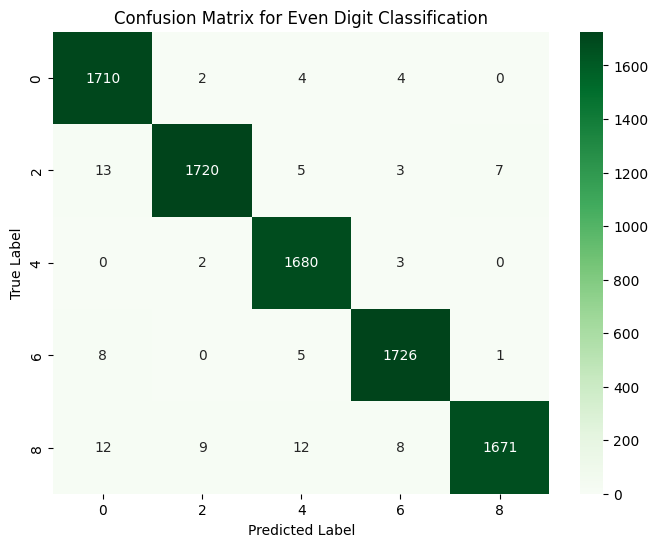

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['0', '2', '4', '6', '8'], yticklabels=['0', '2', '4', '6', '8'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Even Digit Classification')
plt.show()

In [ ]:
import numpy as np

# Filter indices where the true label is '6'
six_indices = np.where(y_test == '6')[0]

# Select the corresponding predicted labels
predicted_sixes = y_pred[six_indices]

# Compare predicted labels with the true label '6'
correctly_classified_sixes = np.sum(predicted_sixes == '6')

# Print the count of correctly classified 6's
print(f"Number of correctly classified 6's in the test set: {correctly_classified_sixes}")

Number of correctly classified 6's in the test set: 1726


Based on the heatmap, there were 1726 correctly identified sixes


# Q3 Iris Kmeans

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = load_iris() #shift+tab
df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
#df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]
display(df)

,sepal length,sepal width,petal width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [ ]:
X = df.to_numpy() # These are our features
df['target'] = data['target']
named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])

df['species_name'] = named_targets

from sklearn.model_selection import train_test_split

y = df['target'].to_numpy()
X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)


X_train shape : (105, 3)
X_test shape : (45, 3)
y_train shape : (105,)
y_test shape : (45,)


['train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'test', 'test', 'test', 'test', 'train', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train'

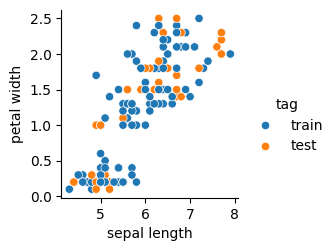

In [ ]:
tag = []

for _ in range(X.shape[0]):
    if _ in idx_train:
        tag.append('train')
    else:
        tag.append('test')

print(tag)
df['tag'] = tag

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='tag')

In [ ]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted_labels: [1 2 1 2 2 0 0 1 0 0 2 0 2 0 1 0 2 1 0 0 0 0 0 2 0 2 2 0 2 2 2 2 1 1 1 1 1
 2 2 0 2 1 1 2 1]
cluster centroids: [[5.04285714 3.43428571 0.26571429]
 [5.76153846 2.69487179 1.40769231]
 [6.76774194 3.03225806 1.95806452]]


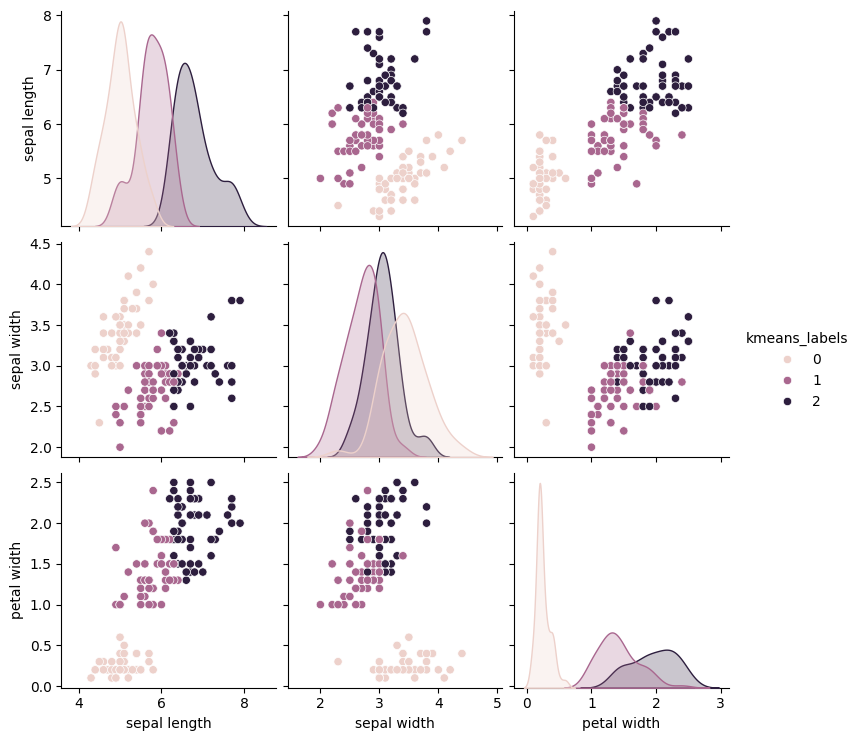

In [ ]:
df['kmeans_labels'] = model.predict(X)
sns.pairplot(df.drop(labels=['target'],axis=1), hue='kmeans_labels')

Text(0, 0.5, 'petal width')

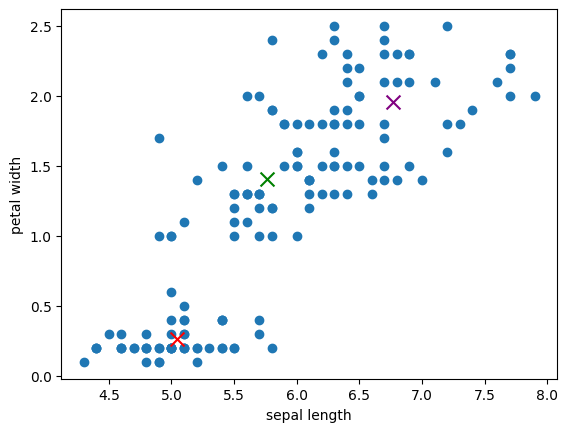

In [ ]:
plt.scatter(df['sepal length'].to_list(), df['petal width'].to_list())
plt.scatter(cluster_coords[0][0], cluster_coords[0][2], color='red', marker='x', s=100)
plt.scatter(cluster_coords[1][0], cluster_coords[1][2], color='green', marker='x', s=100)
plt.scatter(cluster_coords[2][0], cluster_coords[2][2], color='purple', marker='x', s=100)
plt.xlabel('sepal length')
plt.ylabel('petal width')


In [ ]:
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)

KMeans(n_clusters=3)

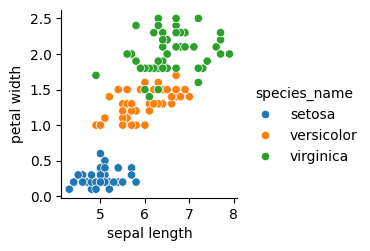

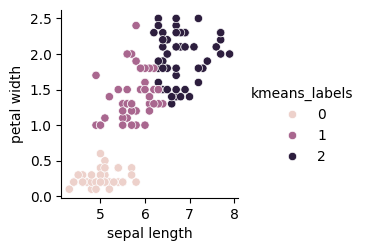

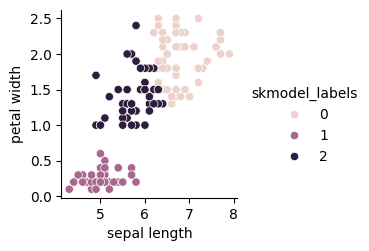

In [ ]:
skmodel_labels = skmodel.predict(X)
df['skmodel_labels'] = skmodel_labels
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='species_name')
# too many plots so let's trim them down

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='kmeans_labels')
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal width'], hue='skmodel_labels')

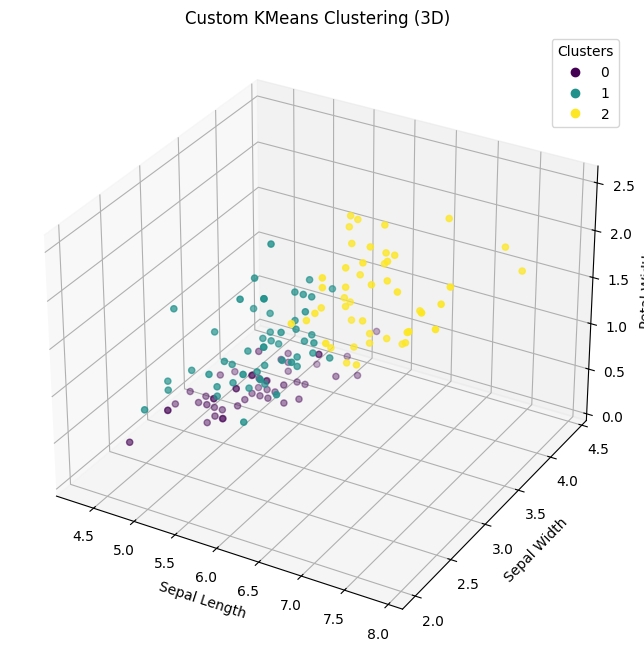

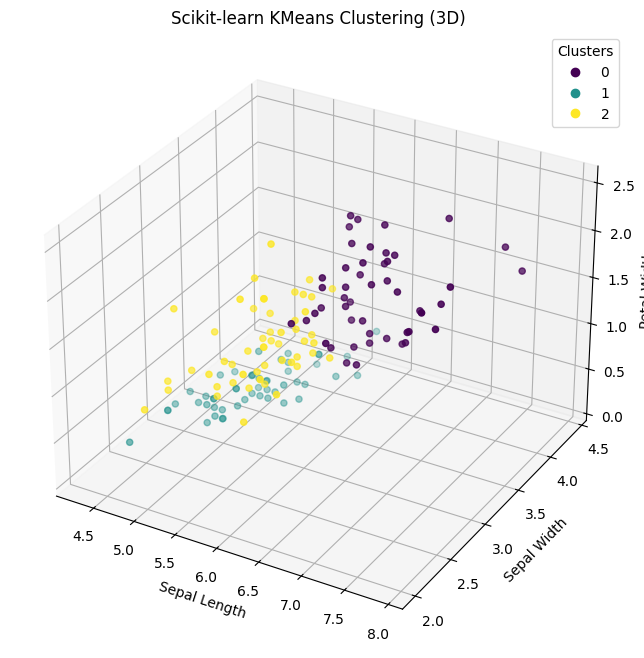

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Get the data with the three chosen features
X_3d = df[['sepal length', 'sepal width', 'petal width']].to_numpy()

# 3D scatter plot for custom KMeans
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=df['kmeans_labels'], cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Width')
ax.set_title('Custom KMeans Clustering (3D)')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# 3D scatter plot for scikit-learn KMeans
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=df['skmodel_labels'], cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Width')
ax.set_title('Scikit-learn KMeans Clustering (3D)')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

Changing the number of clusters changes the number of categories that the model tries to differentiate.